# Capstone Project: Healthcare - PGP
**Problem Statement:**
* NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
* The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
* Build a model to accurately predict whether the patients in the dataset have diabetes or not.

**Dataset Description:**
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.
 
**Variables	- Description**
* Pregnancies -	Number of times pregnant
* Glucose - Plasma glucose concentration in an oral glucose tolerance test
* BloodPressure	- Diastolic blood pressure (mm Hg)
* SkinThickness	- Triceps skinfold thickness (mm)
* Insulin - Two hour serum insulin
* BMI - Body Mass Index
* DiabetesPedigreeFunction - Diabetes pedigree function
* Age - Age in years
* Outcome - Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

### Week 1:

**Data Exploration:**
1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

        • Glucose
        • BloodPressure
        • SkinThickness
        • Insulin
        • BMI
2. Visually explore these variables using histograms. Treat the missing values accordingly.
3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns

In [2]:
df = pd.read_csv("health care diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[col]=df[col].replace(0,np.NAN)

In [6]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

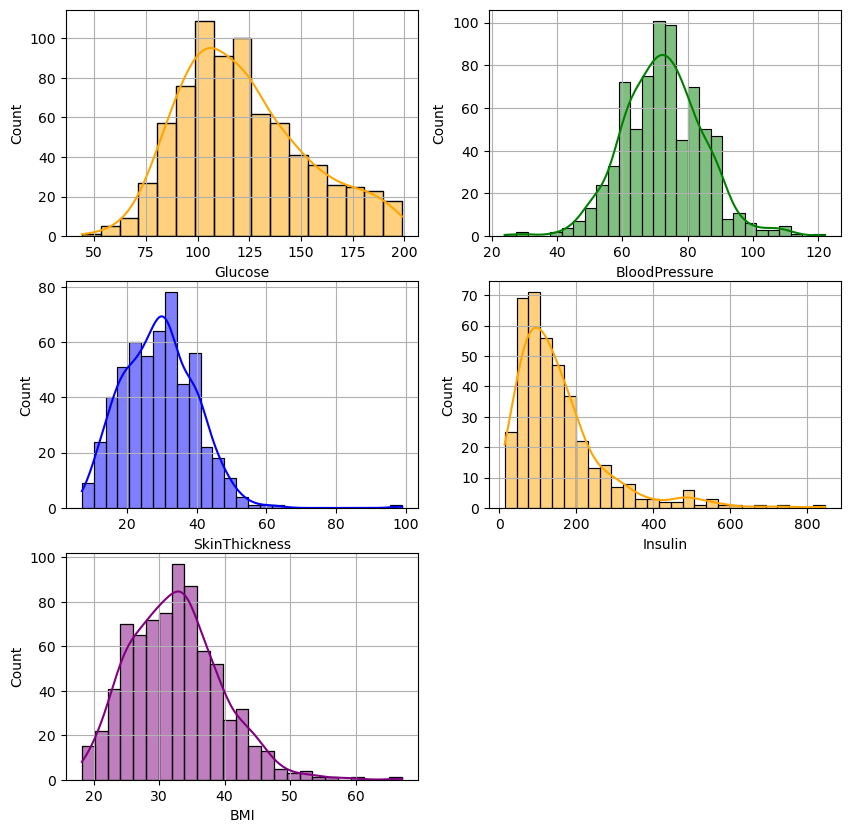

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.histplot(data=df,x='Glucose',kde=True,color='orange')
plt.grid()

plt.subplot(3,2,2)
sns.histplot(data=df,x='BloodPressure',kde=True,color='green')
plt.grid()

plt.subplot(3,2,3)
sns.histplot(data=df,x='SkinThickness',kde=True,color='blue')
plt.grid()

plt.subplot(3,2,4)
sns.histplot(data=df,x='Insulin',kde=True,color='orange')
plt.grid()

plt.subplot(3,2,5)
sns.histplot(data=df,x='BMI',kde=True,color='purple')
plt.grid()
plt.show()

* From the above graphs, it is eveident that insuline is positively skewed and other parameters relatively show normal distribution.
* So we impute the missing values as:
    * Insulin: Fill NAN with median
    * Other columns: Fill NAN with mean

In [8]:
df['Insulin'] = df['Insulin'].fillna(df.Insulin.median())

In [9]:
col = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df[col]=df[col].fillna(df[col].mean())

In [10]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

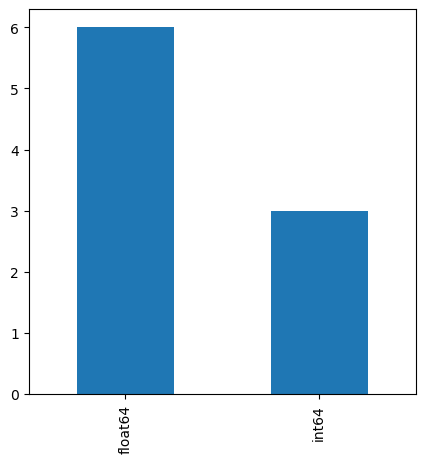

In [11]:
plt.figure(figsize=(5,5))
df.dtypes.value_counts().plot(kind='bar')
plt.show()

### Week 2:
#### Data Exploration:
**(1) Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action:**

0    500
1    268
Name: Outcome, dtype: int64

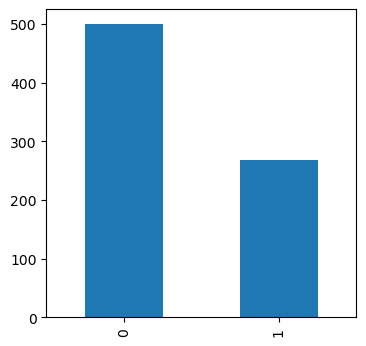

In [12]:
plt.figure(figsize=(4,4))
df['Outcome'].value_counts().plot(kind='bar')
df['Outcome'].value_counts()

* **Dataset is imbalanced and the model is prone to missclassify the target variable. Majority vote will be given to '0'.**
* We will use *SMOTE* to oversample minority class '1', as in this case simple oversampling with duplicate data will not add any value to model training.
* SMOTE will add synthetic data in feature space using KNN technique, which will be around actual values that are recorded for target variable '1'

In [13]:
x = df.drop(columns='Outcome')
y = df.Outcome

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
SM = SMOTE(random_state=2023)
x_res,y_res = SM.fit_resample(x,y)

In [16]:
y_res.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

**(2) Create scatter charts between the pair of variables to understand the relationships. Describe your findings:**

In [17]:
df_res = pd.concat([x_res,y_res],axis=1)

In [18]:
df_res.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1


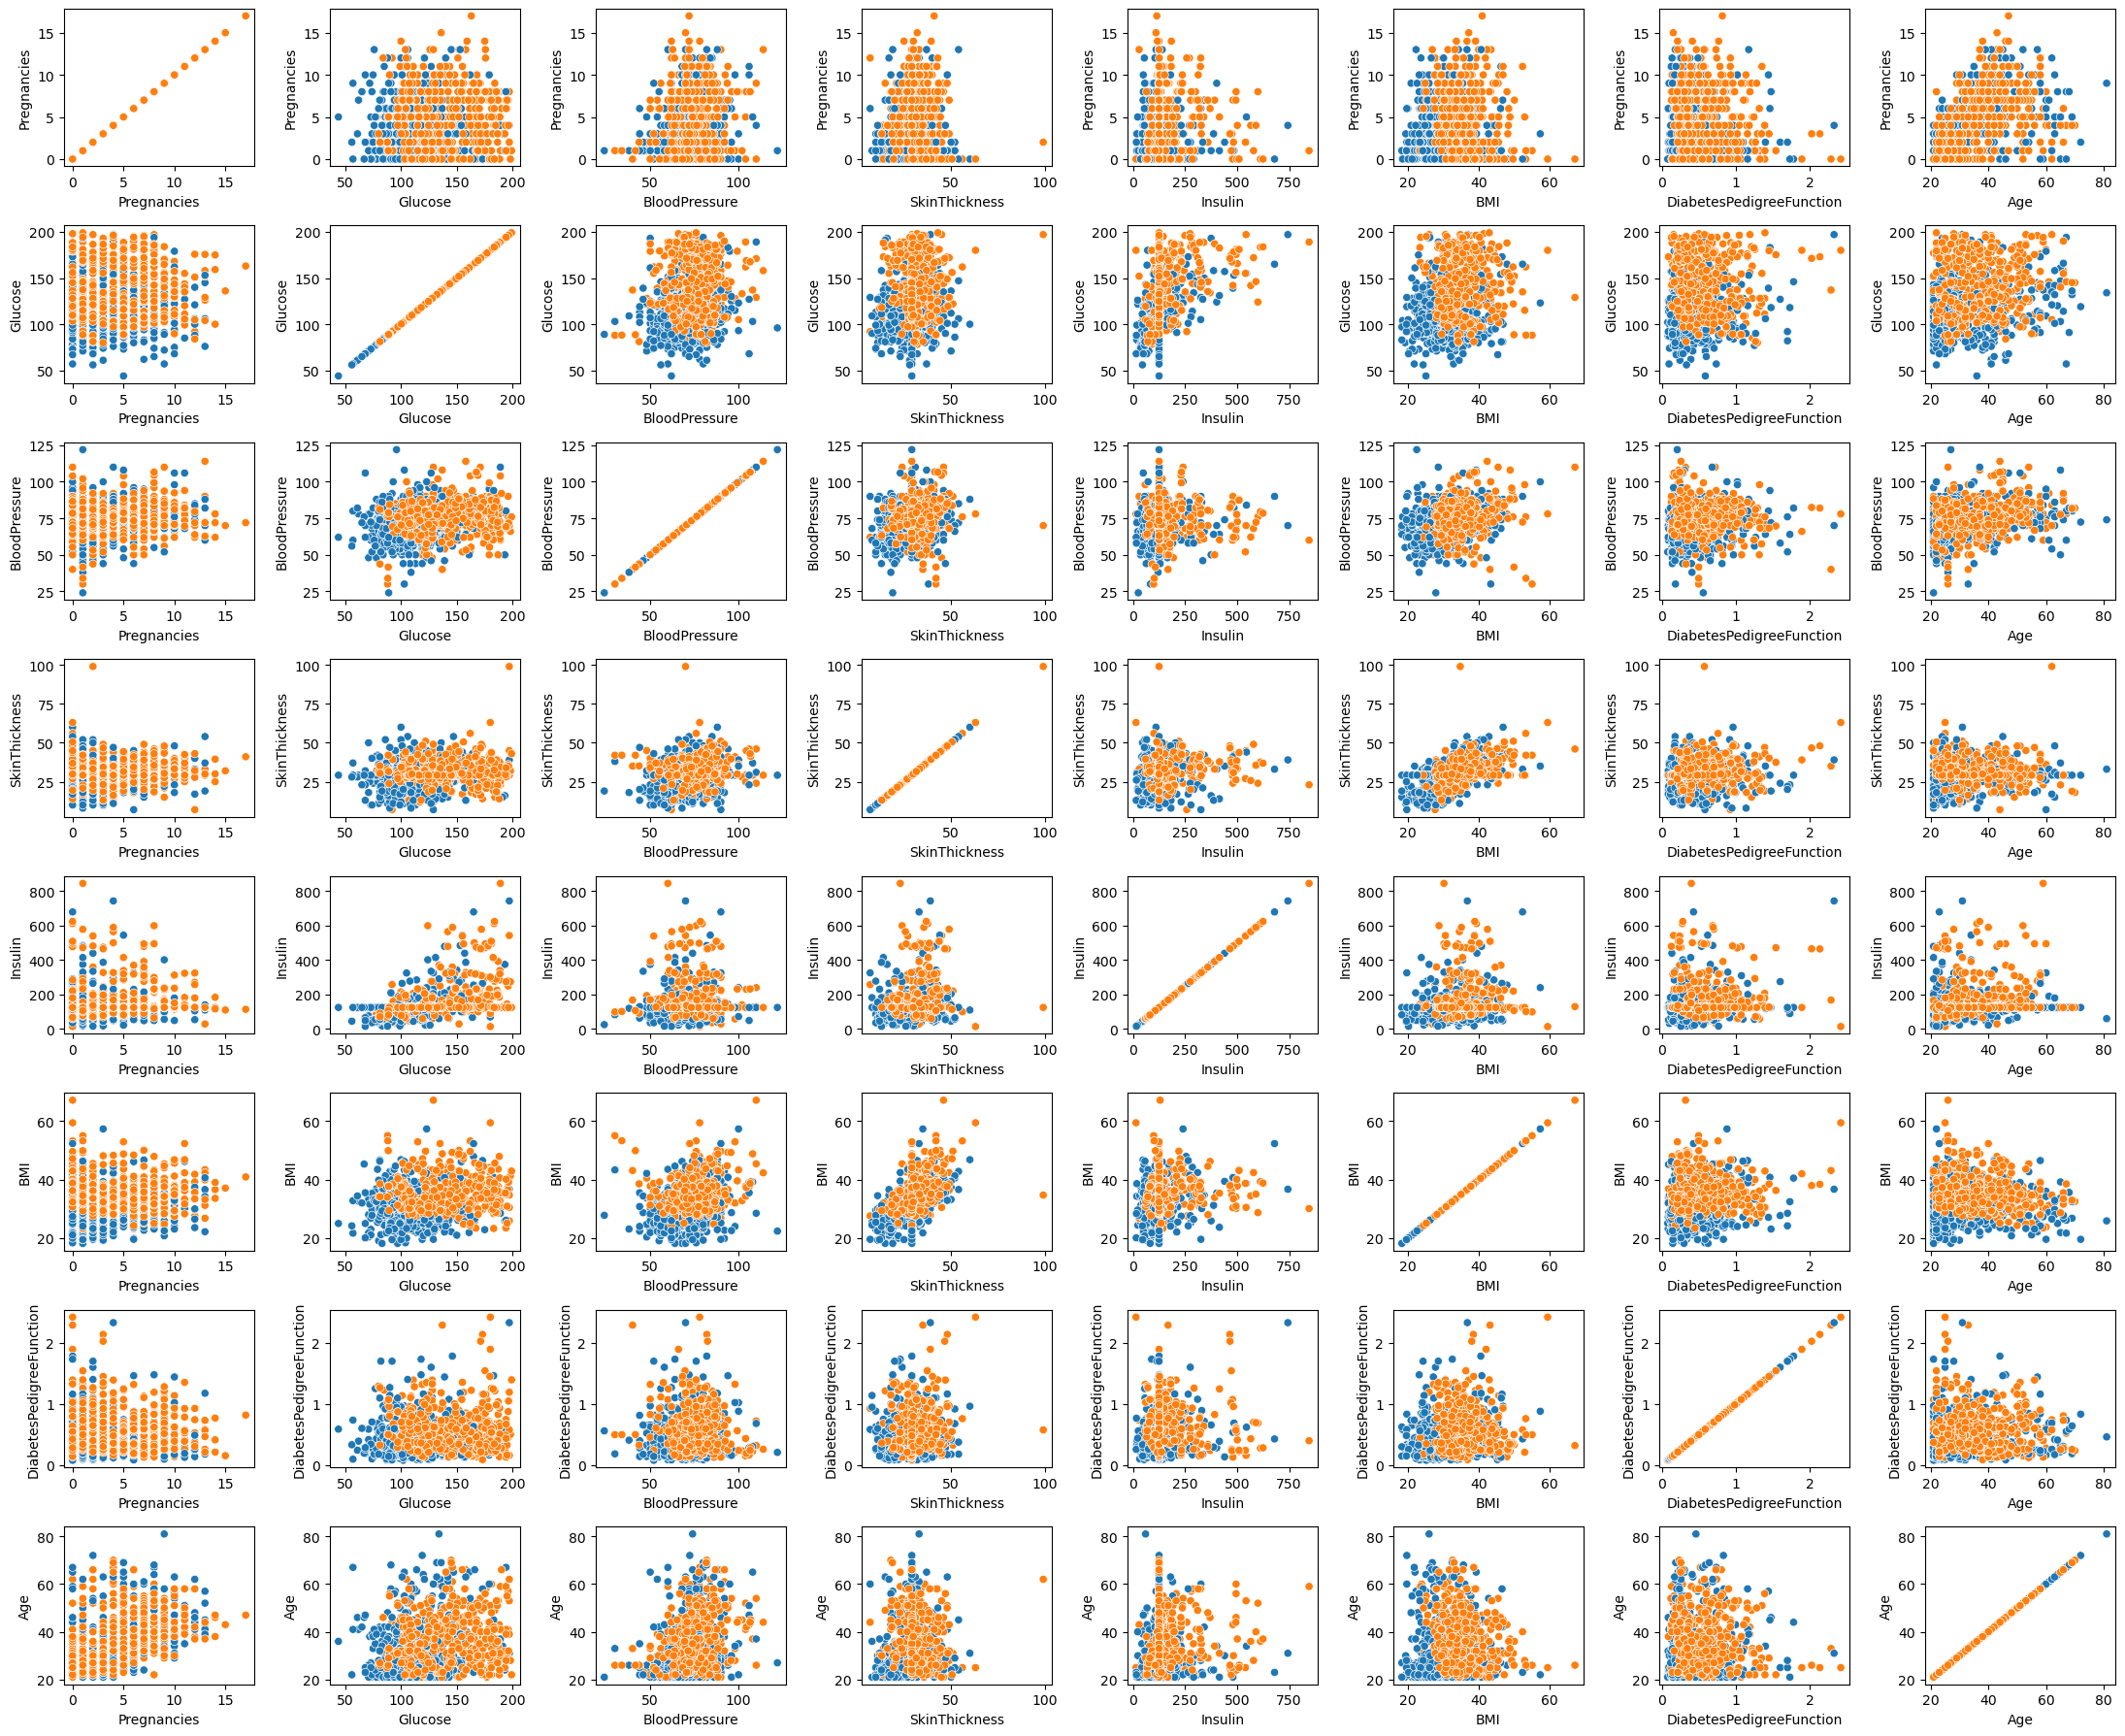

In [19]:
fig, axs = plt.subplots(8,8,figsize=(22,18))

for i,y_col in enumerate(x_res.columns):
    for j, x_col in enumerate(x_res.columns):
        sns.scatterplot(data = df_res, x = x_col,y = y_col,hue='Outcome',ax=axs[i,j],legend=False)

plt.tight_layout()


We have some interesting observations from above scatter plot of pairs of features:
* **Glucose** alone is impressively good to distinguish between the **Outcome** classes.
* **Age** alone is also able to distinguish between classes to some extent.
* It seems none of pairs in the dataset is able to clealry distinguish between the **Outcome** classes.
* We need to use combination of features to build model for prediction of classes in **Outcome**.

**(3) Perform correlation analysis. Visually explore it using a heat map:**

In [20]:
x_res.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.125302,0.215923,0.079819,0.016584,0.013899,-0.041781,0.555453
Glucose,0.125302,1.000000,0.215765,0.185150,0.432287,0.233249,0.122061,0.248733
BloodPressure,0.215923,0.215765,1.000000,0.205526,0.060938,0.271357,0.003227,0.339244
SkinThickness,0.079819,0.185150,0.205526,1.000000,0.189657,0.557224,0.117596,0.098934
Insulin,0.016584,0.432287,0.060938,0.189657,1.000000,0.189466,0.132524,0.097052
BMI,0.013899,0.233249,0.271357,0.557224,0.189466,1.000000,0.153440,0.014795
DiabetesPedigreeFunction,-0.041781,0.122061,0.003227,0.117596,0.132524,0.153440,1.000000,0.020122
Age,0.555453,0.248733,0.339244,0.098934,0.097052,0.014795,0.020122,1.000000


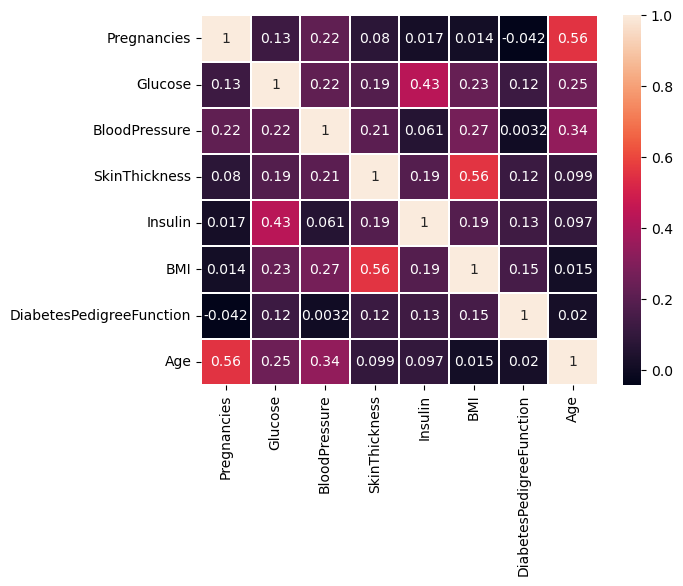

In [21]:
sns.heatmap(data=x_res.corr(),annot=True,linewidths=.2,linecolor='white')
plt.show()

It appears from correlation matrix and heatmap that there exists significant correlation between some pairs such as -
* Age-Pregnancies
* BMI-SkinThickness
* Glucose-Insulin
Also we can see that no pair of variables have negative correlation.

## Week 3:
### Data Modeling:
**(1) Devise strategies for model building. It is important to decide the right validation framework. Express your thought process:**

Since it is a classification problem and we are predicting a medical condition, we will test all the popular classification models for accuracy on test data to predict Outcome.

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, average_precision_score, f1_score,confusion_matrix, classification_report,auc,roc_auc_score,roc_curve,precision_recall_curve

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size=0.2, random_state=2023)
x_train.shape,x_test.shape

((800, 8), (200, 8))

In [35]:
models = []
model_accuracy = []
model_f1 = []
model_auc = []

In [26]:
lr = LogisticRegression(max_iter=300)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=300)

In [27]:
lr.score(x_train,y_train)

0.75375

In [28]:
#test validation score
lr.score(x_test,y_test)

0.74

In [29]:
#Tune hyperparameter 'C' and check
par_dist={'C':np.logspace(-5, 5, 50)}
gs_lr = GridSearchCV(lr,param_grid=par_dist,cv=5,verbose=3,n_jobs=-1)
gs_lr.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300), n_jobs=-1,
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])},
             verbose=3)

In [30]:
gs_lr.best_params_

{'C': 1.2648552168552958}

In [31]:
lr_1 = LogisticRegression(C=1.2648552168552958,max_iter=300)
lr_1.fit(x_train,y_train)
lr_1.score(x_train,y_train)

0.75375

In [32]:
lr_1.score(x_test,y_test)

0.74

auc_score_lr:  0.8256565656565658


[]

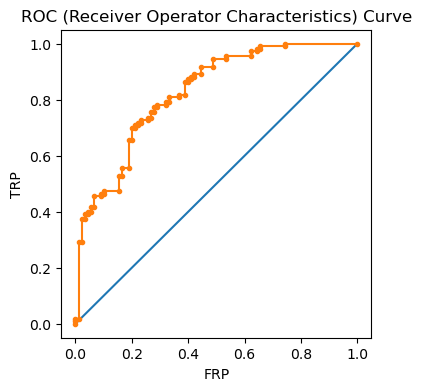

In [33]:
# Ploting ROC curve
prob = lr_1.predict_proba(x_test)

# selecting probability of 1 - positive for test
prob=prob[:,1]
auc_lr = roc_auc_score(y_test,prob)
print('auc_score_lr: ', auc_lr)
frp,trp,threshold = roc_curve(y_test,prob)

plt.figure(figsize=(4,4))

plt.plot([0,1],[0,1],linestyle='-')
plt.plot(frp,trp,marker='.')
plt.title('ROC (Receiver Operator Characteristics) Curve')
plt.xlabel('FRP')
plt.ylabel('TRP')
plt.plot()

F1: 0.7614678899082569
avg_precicion: 0.8373937940460914



[]

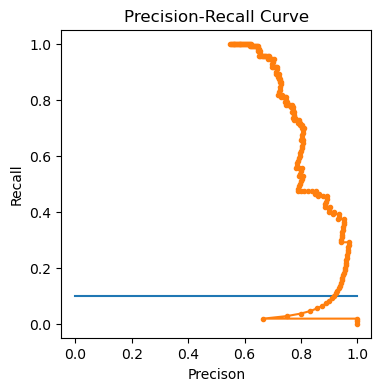

In [34]:
# Precision Recall Curve

y_pred = lr_1.predict(x_test)
f1 = f1_score(y_test,y_pred)
avg_prec = average_precision_score(y_test,prob)

precision,recall,threshold=precision_recall_curve(y_test,prob)
#auc_p = auc(precision,recall)

print('F1: {}\navg_precicion: {}\n'.format(f1,avg_prec))

plt.figure(figsize=(4,4))

plt.plot([0,1],[0.1,0.1],linestyle='-')
plt.plot(precision,recall,marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Precison')
plt.ylabel('Recall')
plt.plot()

In [36]:
models.append('LR')
model_accuracy.append(accuracy_score(y_test,y_pred))
model_f1.append(f1)
model_auc.append(auc_lr)

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [38]:
dt = DecisionTreeClassifier(random_state= 2023)

In [39]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=2023)

In [41]:
dt.score(x_train,y_train)

1.0

In [42]:
# DT show 100% accuracy on train data.
# We will check on test data
dt.score(x_test,y_test)

0.75

In [45]:
# dt show 75% accuracy on test data. We will try to optimize the model by hyperparameter tuning
param_dist = {'max_depth':[1,2,3,4,5,None],
               'criterion':['gini','entropy','log_loss'],
                'min_samples_split':[10,20,40,50,60]}

gs_dt = GridSearchCV(estimator=dt,param_grid=param_dist,cv=5,n_jobs=-1,verbose=3)
gs_dt.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2023),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, None],
                         'min_samples_split': [10, 20, 40, 50, 60]},
             verbose=3)

In [46]:
gs_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', min_samples_split=50,
                       random_state=2023)

In [47]:
gs_dt.best_score_

0.7775000000000001

In [59]:
dt_1 = DecisionTreeClassifier(criterion='entropy', min_samples_split=50,random_state=2023)
dt_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=50,
                       random_state=2023)

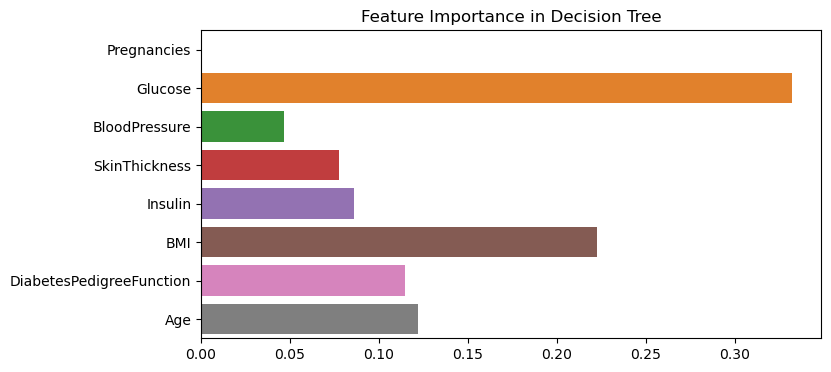

In [63]:
# Plotting feature importance
plt.figure(figsize=(8,4))
sns.barplot(x=dt_1.feature_importances_,y=x_train.columns)
plt.title('Feature Importance in Decision Tree')
plt.show()

In [61]:
#Train Data score
dt_1.score(x_train,y_train)

0.84

In [62]:
#Test Data score
dt_1.score(x_test,y_test)

0.785

AUC_dt score:  0.827020202020202


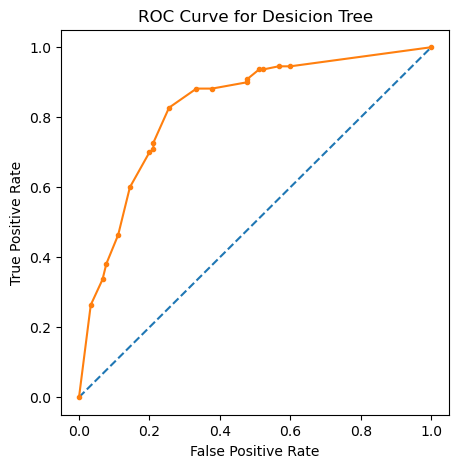

In [67]:
# ROC Curve
y_prob = dt_1.predict_proba(x_test)
y_prob = y_prob[:,1]
auc_dt = roc_auc_score(y_test,y_prob)
print('AUC_dt score: ',auc_dt)

frp,trp,threshold = roc_curve(y_test,y_prob)
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(frp,trp,marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve for Desicion Tree')
plt.show()

F1 Scire DT:  0.8185654008438819


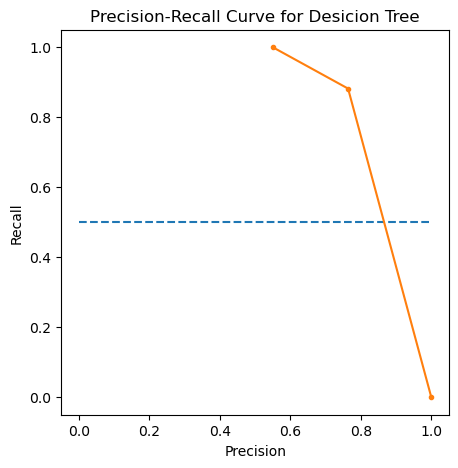

In [71]:
# Ploting Precision-Recall Curve
y_pred = dt_1.predict(x_test)
f1 = f1_score(y_test,y_pred)
precision,recall, threshold = precision_recall_curve(y_test,y_pred)
print('F1 Scire DT: ',f1)

plt.figure(figsize=(5,5))
plt.plot([0,1], [0.5, 0.5], linestyle='--')
plt.plot(precision,recall,marker='.')
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title('Precision-Recall Curve for Desicion Tree')
plt.show()